In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

%matplotlib inline
import _init_paths
from PIL import Image
import matplotlib.pyplot as plt
from ult.config import cfg

import _init_paths
import pickle
import json
import numpy as np
import cv2
import os
import sys

DATA_DIR="E:\DATASETS\VCOCO"#"/DATACENTER1/zhw/data"

In [2]:
Detection = pickle.load( open( cfg.ROOT_DIR + "/Results/CVPR_best_VCOCO_nis_best_lis.pkl", "rb" ) )
#Detection = pickle.load( open( cfg.ROOT_DIR + "/Results/CVPR_best_VCOCO_Mytest15000_nis_best_lis_1.pkl", "rb" ) )
#Detection = pickle.load( open( cfg.ROOT_DIR + "/Results/300000_iCAN_ResNet50_VCOCO.pkl", "rb" ),encoding="latin1" )

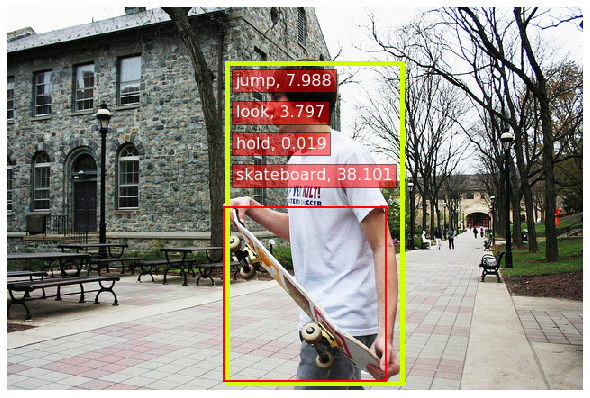

In [12]:
image_id = 14041
#152202
#2014
# 23359
#565248

cc = plt.get_cmap('hsv', lut=6)
dpi = 80

im_file = DATA_DIR + '/v-coco/coco/images/val2014/COCO_val2014_' + (str(image_id)).zfill(12) + '.jpg'
im_data = plt.imread(im_file)
height, width, nbands = im_data.shape
figsize = width / float(dpi), height / float(dpi)
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(im_data, interpolation='nearest')

HO_dic = {}
HO_set = set()
count = 0


for ele in Detection:
    if (ele['image_id'] == image_id):
        action_count = -1
        
        for action_key, action_value in ele.items():
            if (action_key.split('_')[-1] != 'agent') and action_key != 'image_id' and action_key != 'person_box'and action_key != 'object_class'and action_key != 'object_box'and action_key != 'binary_score':
                #print(action_value[:4])
            #if ele['object_box'] :
                if (not np.isnan(action_value[0])) and (action_value[4] >0.01):
                    #print(action_value[:5])
                    O_box = action_value[:4]
                    H_box = ele['person_box'] 
                    
                    action_count += 1
                    
                    if tuple(O_box) not in HO_set:
                        HO_dic[tuple(O_box)] = count
                        HO_set.add(tuple(O_box))
                        count += 1      
                    if tuple(H_box) not in HO_set:
                        HO_dic[tuple(H_box)] = count
                        HO_set.add(tuple(H_box))
                        count += 1 
                
                    ax.add_patch(
                    plt.Rectangle((H_box[0], H_box[1]),
                                  H_box[2] - H_box[0],
                                  H_box[3] - H_box[1], fill=False,
                                  edgecolor=cc(HO_dic[tuple(H_box)])[:3], linewidth=5)
                    )
                    text = action_key.split('_')[0] + ', ' + "%.3f" % action_value[4]


                    ax.text(H_box[0] + 10, H_box[1] + 25 + action_count * 35,
                        text,
                        bbox=dict(facecolor=cc(HO_dic[tuple(O_box)])[:3], alpha=0.5),
                        fontsize=16, color='white')

                    ax.add_patch(
                    plt.Rectangle((O_box[0], O_box[1]),
                                  O_box[2] - O_box[0],
                                  O_box[3] - O_box[1], fill=False,
                                  edgecolor=cc(HO_dic[tuple(O_box)])[:3], linewidth=2)
                    )
                    ax.set(xlim=[0, width], ylim=[height, 0], aspect=1)

In [168]:
rc1=[0]*4
rc2=[0]*4
i=0
def isOverlap(rc1, rc2):
    if  (rc1[0] + rc1[2]-rc1[0])  < rc2[0] or rc2[0] + rc2[2]-rc2[0]  < rc1[0] or 
    rc1[1] + rc1[3]-rc1[1] < rc2[1] or rc2[1] + rc2[3]-rc2[1] < rc1[1]:
        return 1
    else:
        return 0

for ele in Detection:

    for action_key, action_value in ele.items():
        if action_key == 'person_box':
            rc1=action_value[:4]
        if (action_key.split('_')[-1] != 'agent') and action_key != 'image_id' and action_key != 'person_box'and 
        action_key != 'object_class'and action_key != 'object_box'and action_key != 'binary_score':
        #if (action_key == 'ride_instr') and action_key != 'image_id' and action_key != 'person_box':
            if (not np.isnan(action_value[0])) and (action_value[4] > 1):
                rc2 = action_value[:4]
            #if (not np.isnan(action_value[0])) and (action_value[4] > 0.1):
                if isOverlap(rc1,rc2):
                    if i!=ele['image_id']:
                        print(ele['image_id'])
                        i=ele['image_id']


328
395
536
764
831
1176
1180
1960
1987
2014
2179
2473
2867
2890
3103
3378
3553
3694
4275
4554
4700
4840
5032
5124
5476
5644
5728
6712
6771
6864
7260
7298
7593
7873
7977
8065
8119
8191
8589
8771
9400
9941
10216
10526
11209
11625
11699
12020
12047
12081
12413
12552
12744
12979
13081
13379
13546
13659
13904
14041
14088
14167
15032
15067
15778
15826
15846
15908
16064
16744
16879
16897
16961
17273
17364
17869
18841
19275
19292
19324
19592
19667
20334
20459
20646
21029
21764
21979
21989
22085
22850
22935
23034
23294
23446
23895
23991
24040
24285
24958
25057
25143
25358
25386
25846
26448
26690
26734
27371
27569
27611
27871
27897
28174
28676
29045
29524
29793
30347
31041
31106
31882
32001
32300
32549
33845
34372
34786
35279
35671
36252
36420
36539
36561
37655
37689
37783
37988
38031
38336
38449
38753
39115
39211
39671
39731
40729
40989
41212
41687
41990
42288
42661
42737
42979
43289
43657
44065
44312
44476
44627
44743
45626
45687
45864
46882
47361
47511
47801
48129
48133
48332
49327
49731
498

390731
391179
391199
391222
391225
391688
392382
392391
392392
392665
392990
393271
393743
393777
393809
394533
394535
394724
395291
395621
396200
396541
396687
397274
397475
397658
398377
398438
398505
398722
398798
398803
399415
399790
400062
400516
400528
400538
401828
401901
402328
402499
403891
404367
404373
404464
404613
404944
405093
405166
405191
405216
405222
405261
405657
406129
406723
406810
407274
407291
407521
407644
407646
407903
408049
408208
408449
408746
409016
409221
409572
409985
410328
410484
410496
410614
410638
410810
410942
411086
411303
411530
411642
411768
411908
412286
412301
412419
412876
412975
413126
413666
414201
414289
414576
414661
414673
414698
414744
415135
415153
415393
416059
416159
416478
416730
417216
417339
417547
417727
417965
419223
419369
419408
419444
419453
419816
420002
420339
420357
420411
421139
421360
421361
421535
421566
421833
421955
422200
422833
422893
422982
423358
423464
423498
423529
423894
423962
424147
424247
424933
424960
425100